In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action='ignore') 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [3]:
df = pd.read_csv('../../../high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


0    4949
1    4930
Name: blueWins, dtype: int64


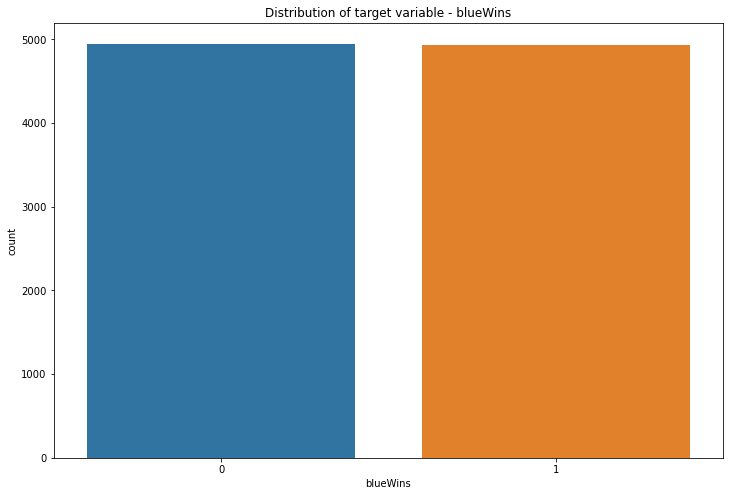

In [4]:
plt.figure(figsize=(12,8))
plt.title('Distribution of target variable - blueWins')
plt.ylabel('Amount of wins')
sns.countplot(df['blueWins'])
print(df['blueWins'].value_counts())

In [5]:
#df = df.drop('gameId', axis=1)

In [6]:
df = df.drop(['gameId','redKills','blueCSPerMin','redHeralds','blueTotalExperience',
'redTotalGold','redTotalMinionsKilled','blueHeralds','blueDeaths','blueWardsDestroyed','redGoldPerMin','blueGoldDiff', 'redGoldDiff', 'redExperienceDiff', 'blueExperienceDiff'], axis=1)

In [7]:
X = df.drop('blueWins',axis=1)
y = df.blueWins
X_tr, X_test, y_tr, y_test = train_test_split(X,y,random_state=42)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state=42)

In [9]:
def modeling_function(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    print('Training accuracy:', accuracy_score(y_train, train_preds))
    print("validation accuracy: ", accuracy_score(y_val, val_preds))

    return model

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X.columns)

In [13]:
dtc = DecisionTreeClassifier(random_state=42)

In [14]:
dtc_fitted = modeling_function(dtc, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 1.0
validation accuracy:  0.634646519158122


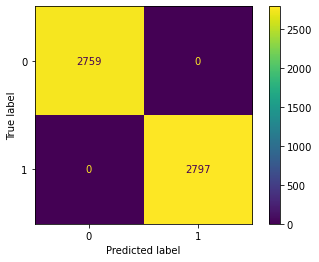

In [15]:
plot_confusion_matrix(dtc_fitted, X_train_scaled, y_train)

In [16]:
param_grid = {'criterion': ["gini", "entropy"],
             'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14],
             'max_depth': [2,3,4,5,6,7,8,9,10,11,12]
             }

In [17]:
dtc_gs = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring='accuracy')

In [18]:
dtc_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14]},
             scoring='accuracy')

In [19]:
dtc_gs_model = dtc_gs.best_estimator_

In [20]:
dtc_gs.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 14}

In [21]:
dtc2 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=14, random_state=42)

In [22]:
modeling_function(dtc2, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7167026637868971
validation accuracy:  0.7166756610901241


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=14, random_state=42)

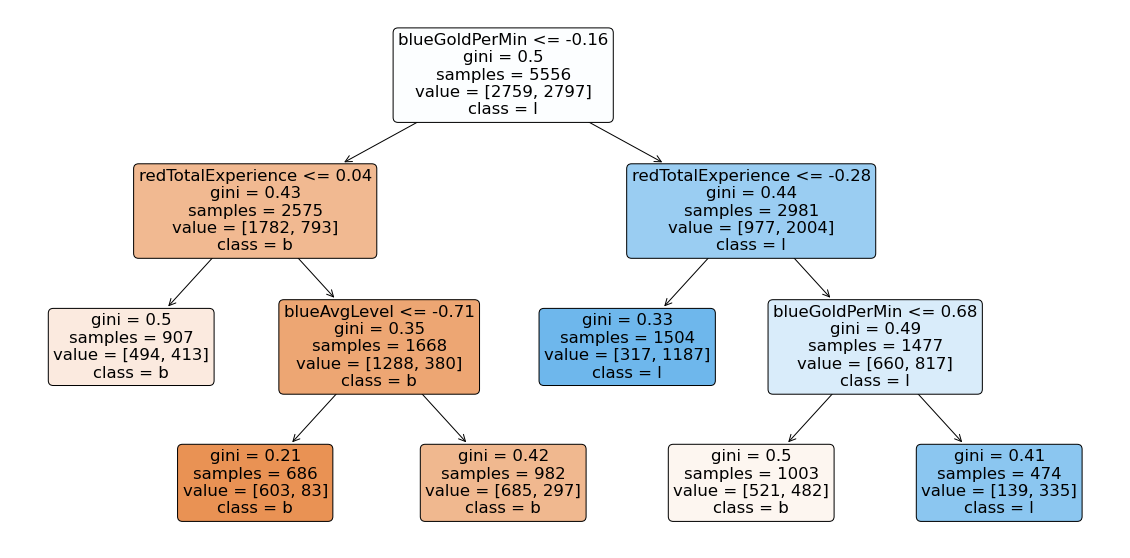

In [23]:


final_tree_model = DecisionTreeClassifier(max_depth = 4,max_leaf_nodes=6, random_state=42)
final_tree_model.fit(X_train_scaled, y_train)
predictions = final_tree_model.predict(X_val_scaled)
plt.figure(figsize=(20,10)) 
_ = plot_tree(final_tree_model, feature_names = X_train.columns, class_names = 'blueWins',
                rounded = True, proportion = False, precision = 2, filled = True)



In [24]:
logreg = LogisticRegression()

In [25]:
logreg_fitted = modeling_function(logreg, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7244420446364291
validation accuracy:  0.7280086346465191


In [26]:
logreg2 = LogisticRegression(penalty='l1', solver='liblinear', C=.13, random_state=42, max_iter=5000,verbose=4)

In [27]:
logreg2.fit(X_train_scaled, y_train)

[LibLinear]

LogisticRegression(C=0.13, max_iter=5000, penalty='l1', random_state=42,
                   solver='liblinear', verbose=4)

In [28]:
logreg2_fitted= modeling_function(logreg2, X_train_scaled, y_train, X_val_scaled, y_val)

[LibLinear]Training accuracy: 0.7237221022318214
validation accuracy:  0.733405288720993


In [29]:
logreg3 = LogisticRegression(max_iter = 1000, penalty = 'l1', verbose = 1, C = .1, solver='liblinear')

In [30]:
logreg3.fit(X_train_scaled, y_train)

[LibLinear]

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear',
                   verbose=1)

In [31]:
logreg3_fitted = modeling_function(logreg3, X_train_scaled, y_train, X_val_scaled, y_val)

[LibLinear]Training accuracy: 0.7239020878329734
validation accuracy:  0.7355639503507825


In [38]:
XGB = XGBClassifier(learning_rate=0.03, n_estimators=1000, n_jobs=-1,max_depth=5)

XGB2 = XGBClassifier(n_jobs=-1,eval_metric='mlogloss')



In [33]:
modeling_function(XGB, X_train_scaled, y_train, X_val_scaled, y_val)

[14:19:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy: 0.8930885529157667
validation accuracy:  0.7209929843497032


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
param_grid2 = {'learning_rate': [.01,.03,.05,.07],
             'n_estimators': [300,500,700,1000],
             'max_depth': [1,2,3,4,5,6,7,8]
             }

In [48]:
XGB_gs = GridSearchCV(estimator=XGB2, param_grid=param_grid2, scoring='accuracy')

In [49]:
XGB_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
              

In [50]:
model3 = XGB_gs.best_estimator_

In [51]:
 XGB_gs.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300}

In [54]:
XGB3 = XGBClassifier(learning_rate=0.01, n_estimators=300, n_jobs=-1,max_depth=6)

In [55]:
modeling_function(XGB3, X_train_scaled, y_train, X_val_scaled, y_val)

[15:10:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy: 0.7933765298776098
validation accuracy:  0.7350242849433352


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)